<a href="https://colab.research.google.com/github/SohailKhanPAK/software-tweets-categoriztion-in-3-categories-/blob/main/FA19_MSCS_0064_Thesis_2_Code_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import All Libraries**

In [ ]:
pip install autocorrect

     |████████████████████████████████| 624kB 5.1MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.0-cp37-none-any.whl size=621854 sha256=9b4ae883b0f4dec077c9a21e536ccaf83f74d6e6b190b2081dfa1df889717b56
  Stored in directory: /root/.cache/pip/wheels/1f/71/da/4a15028d25fbd5fb97fb76c5f76f0ad86f0caa69394dd7cfa7
Successfully built autocorrect


In [ ]:
pip install contractions

     |████████████████████████████████| 327kB 5.1MB/s 
     |████████████████████████████████| 286kB 33.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85411 sha256=952f5d69718c9743ce59952b350bf1c8014611fa94ebaad82eac80888c6e12aa
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
import os
import re
from autocorrect import Speller
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import contractions
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
nlp_spacy = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Initilzing X & Y**

In [ ]:
df= pd.read_excel('/content/shuftle old dataset preprocessed.xlsx')
# df = df[0:3980]
Y_tweet_Category  =   df['Tweets Category']
Y_F_NF    =    df['F/NF']
tweets=  df['PreProceesed tweets']

**TF-IDF**

In [ ]:
def TF_IDF_Vectorizer(tweets_preprocessed,n):
  vectorizer = TfidfVectorizer(ngram_range=n)
  X = vectorizer.fit_transform(tweets_preprocessed)
  train_featureName = vectorizer.get_feature_names()
  print(f"Feature Names :  {train_featureName}")
  print(f"Shape of X = {X.shape}")
  return (X,vectorizer)

**Bigram Model is Performing Better**

In [ ]:
# X_simple_unigram =TF_IDF_Vectorizer(tweets ,(1,1))
X_simple_bigram,X_simple_bigram_vectorizer =TF_IDF_Vectorizer(tweets,  (1,2))

Feature Names :  ['aa', 'aa yt', 'aaronbjork', 'aaronbjork the', 'aarrrggghhhh', 'aarrrggghhhh continuousdelivery', 'ab', 'ab testing', 'abbott', 'abbyygail', 'abel', 'abel follow', 'abeljsings', 'abeljsings rtpliz', 'ability', 'ability to', 'able', 'able cheer', 'able to', 'able toronto', 'about', 'about accusing', 'about adding', 'about agree', 'about an', 'about android', 'about androidpay', 'about bo', 'about boot', 'about changing', 'about commercial', 'about detailed', 'about dislike', 'about doc', 'about doing', 'about dropping', 'about encryption', 'about finding', 'about fixing', 'about frequent', 'about fucking', 'about game', 'about getting', 'about giving', 'about in', 'about is', 'about it', 'about line', 'about mac', 'about me', 'about migrating', 'about mil', 'about min', 'about mln', 'about montana', 'about movie', 'about my', 'about once', 'about overdrive', 'about own', 'about people', 'about pink', 'about porn', 'about program', 'about redhead', 'about reporting', 'a



> **10FOLD VALIDATION**



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
score_logistic = cross_val_score(LogisticRegression(solver='saga',multi_class='auto'), X_simple_bigram, Y_tweet_Category,cv=10)

score_SVM = cross_val_score(SVC(kernel='linear',gamma='scale' ), X_simple_bigram, Y_tweet_Category,cv=10)

score_NaiveBayes = cross_val_score(MultinomialNB(), X_simple_bigram, Y_tweet_Category,cv=10)

score_DecissionTree = cross_val_score(DecisionTreeClassifier(), X_simple_bigram, Y_tweet_Category,cv=10)

score_RandomForest = cross_val_score(RandomForestClassifier(), X_simple_bigram, Y_tweet_Category,cv=10)

In [ ]:
import pandas as pd

result_all =  {
   'Algorithms':['Support vector Machine (SVM)',"LogisticRegression",'NaiveBayes','Decission Tree','RandomForest'],
   'Accuracy & Results' : [np.average(score_SVM),np.average(score_logistic),np.average(score_NaiveBayes),np.average(score_DecissionTree),np.average(score_RandomForest)]
}

df_last = pd.DataFrame(result_all)
df_last

,Algorithms,Accuracy & Results
0,Support vector Machine (SVM),0.75125
1,LogisticRegression,0.71825
2,NaiveBayes,0.63325
3,Decission Tree,0.64775
4,RandomForest,0.69475


**Building SVM Model**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =  train_test_split(X_simple_bigram, Y_tweet_Category, test_size=0.15 , random_state=5)         
print(X_train.shape)

print(X_test.shape)
from sklearn.svm import SVC
SVM_Classifier_tweetCategory = SVC(kernel='linear',gamma='auto')
SVM_Classifier_tweetCategory.fit(X_train,Y_train)
predictions_tweetCategory = SVM_Classifier_tweetCategory.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cm_tweet_category=confusion_matrix(Y_test,predictions_tweetCategory)
print(cm_tweet_category)
print(classification_report(Y_test,predictions_tweetCategory))
RESULT_SVM=classification_report(Y_test,predictions_tweetCategory,output_dict=True)
print(RESULT_SVM['accuracy'])

SVMWithBigram_category=RESULT_SVM['accuracy']

(3383, 35911)
(597, 35911)
[[115  39   2]
 [ 10 267  21]
 [ 10  59  74]]
                  precision    recall  f1-score   support

             Bug       0.85      0.74      0.79       156
           Other       0.73      0.90      0.81       298
Request Features       0.76      0.52      0.62       143

        accuracy                           0.76       597
       macro avg       0.78      0.72      0.74       597
    weighted avg       0.77      0.76      0.76       597

0.7638190954773869


Text(69.0, 0.5, 'Truth')

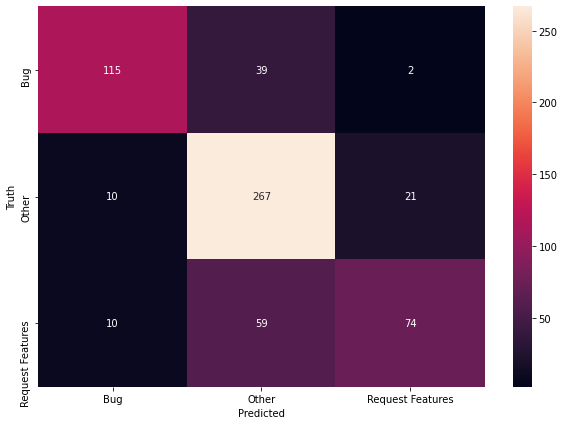

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_tweet_category,annot = True, fmt='d',xticklabels=['Bug','Other','Request Features'], yticklabels=['Bug','Other','Request Features'])
plt.xlabel('Predicted')
plt.ylabel('Truth')


**Functional Non Functional Model**

In [ ]:
df_bug = df[df['Tweets Category']=='Bug']
tweets_bug=  df_bug['PreProceesed tweets']
cateogry_bug=  df_bug['F/NF']

In [ ]:
df_req = df[df['Tweets Category']=='Request Features']
tweets_req=  df_req['PreProceesed tweets']
cateogry_req=  df_req['F/NF']

In [ ]:
X_bug_simple_unigram,X_bug_simple_unigram_vectorizer =TF_IDF_Vectorizer(tweets_bug ,(1,1))
# X_bug_simple_bigram =TF_IDF_Vectorizer(tweets_bug,  (1,2))

Feature Names :  ['aarrrggghhhh', 'ab', 'abbyygail', 'able', 'about', 'absolute', 'abuse', 'ac', 'acc', 'acceleration', 'accelerator', 'accent', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accessing', 'accidentally', 'account', 'accountasked', 'accountsnon', 'acct', 'accusing', 'achievement', 'acknowledge', 'acquire', 'across', 'act', 'acting', 'action', 'activate', 'activation', 'actualite', 'actualization', 'actually', 'ad', 'adapter', 'add', 'added', 'adding', 'addition', 'address', 'addressed', 'admin', 'admitted', 'advance', 'advertised', 'advice', 'advise', 'advised', 'aeolus', 'afeeee', 'affect', 'affected', 'afford', 'aft', 'after', 'afternoon', 'again', 'againnow', 'against', 'age', 'agent', 'ago', 'agree', 'agreement', 'aid', 'air', 'airspace', 'album', 'alex', 'aliceyvonne', 'all', 'allow', 'allowed', 'allowing', 'allows', 'allpluginsdisabled', 'almost', 'alone', 'along', 'alphabet', 'already', 'alright', 'also', 'alt', 'alternative', 'although', 'always'

In [ ]:
# X_req_simple_unigram =TF_IDF_Vectorizer(tweets_req ,(1,1))
X_req_simple_bigram,X_req_simple_bigram_vectorizer =TF_IDF_Vectorizer(tweets_req,  (1,2))

Feature Names :  ['ability', 'ability to', 'able', 'able to', 'about', 'about adding', 'about an', 'about android', 'about androidpay', 'about bo', 'about detailed', 'about doing', 'about getting', 'about in', 'about is', 'about it', 'about line', 'about montana', 'about movie', 'about pink', 'about porn', 'about silence', 'about some', 'about that', 'about the', 'about they', 'about this', 'about time', 'about to', 'about trying', 'about user', 'about we', 'about whose', 'about you', 'above', 'above the', 'absolutely', 'absolutely essential', 'absolutely hate', 'absolutely no', 'absolutely terrible', 'absolutely unbearable', 'abt', 'abt my', 'accept', 'accept it', 'accept or', 'accept request', 'acceptable', 'acceptable please', 'access', 'access savage', 'access snapshot', 'access to', 'accidentally', 'accidentally look', 'accidentally ringing', 'according', 'according to', 'account', 'account and', 'account anymore', 'account button', 'account for', 'account from', 'account gabrielt

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =  train_test_split(X_bug_simple_unigram, cateogry_bug, test_size=0.15 , random_state=2)         
print(X_train.shape)
print(X_test.shape)
from sklearn.svm import SVC
SVM_Classifier_uniGram_bug = SVC(kernel='linear',gamma='auto')
SVM_Classifier_uniGram_bug.fit(X_train,Y_train)
predictions_SVM_uniGram_bug = SVM_Classifier_uniGram_bug.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,predictions_SVM_uniGram_bug))
cm_F_NF_bug = confusion_matrix(Y_test,predictions_SVM_uniGram_bug)
print(classification_report(Y_test,predictions_SVM_uniGram_bug))
RESULT_SVM=classification_report(Y_test,predictions_SVM_uniGram_bug,output_dict=True)
print(RESULT_SVM['accuracy'])
SVMWithUniGram_bug=RESULT_SVM['accuracy']

(897, 2246)
(159, 2246)
[[71 13]
 [17 58]]
              precision    recall  f1-score   support

           F       0.81      0.85      0.83        84
          NF       0.82      0.77      0.79        75

    accuracy                           0.81       159
   macro avg       0.81      0.81      0.81       159
weighted avg       0.81      0.81      0.81       159

0.8113207547169812


Text(69.0, 0.5, 'Truth')

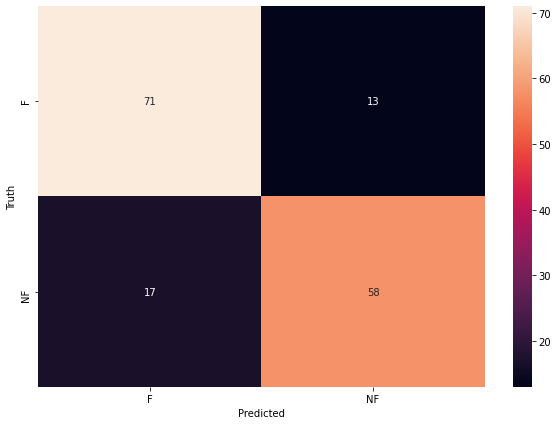

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_F_NF_bug,annot = True, fmt='d',xticklabels=['F','NF'], yticklabels=['F','NF'])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =  train_test_split(X_req_simple_bigram, cateogry_req, test_size=0.15 , random_state=7)         
print(X_train.shape)
print(X_test.shape)
from sklearn.svm import SVC
SVM_Classifier_uniGram_req = SVC(kernel='linear',gamma='auto')
SVM_Classifier_uniGram_req.fit(X_train,Y_train)
predictions_SVM_uniGram_req = SVM_Classifier_uniGram_req.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,predictions_SVM_uniGram_req))
cm_F_NF_req=confusion_matrix(Y_test,predictions_SVM_uniGram_req)
print(classification_report(Y_test,predictions_SVM_uniGram_req))
RESULT_SVM=classification_report(Y_test,predictions_SVM_uniGram_req,output_dict=True)
print(RESULT_SVM['accuracy'])
SVMWithBiGram_req=RESULT_SVM['accuracy']

(804, 11942)
(142, 11942)
[[51 19]
 [19 53]]
              precision    recall  f1-score   support

           F       0.73      0.73      0.73        70
          NF       0.74      0.74      0.74        72

    accuracy                           0.73       142
   macro avg       0.73      0.73      0.73       142
weighted avg       0.73      0.73      0.73       142

0.7323943661971831


Text(69.0, 0.5, 'Truth')

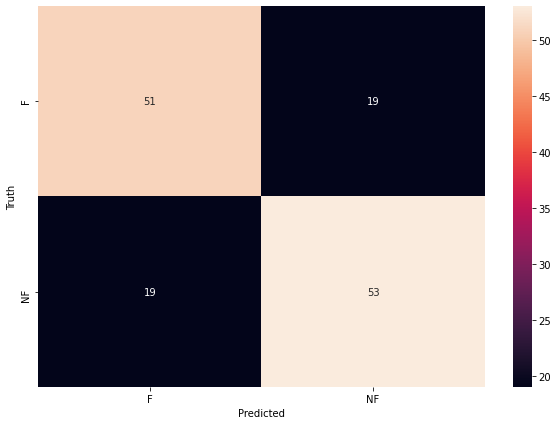

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_F_NF_req,annot = True, fmt='d',xticklabels=['F','NF'], yticklabels=['F','NF'])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import pandas as pd
result_all =  {
   'Algorithm':['SVM_UniGram',"SVM_Bigram"],
   'Tweet Cateogry' : ['Less Accuracy Than Bigram',SVMWithBigram_category],
   'F/NF' : ['Accuracy of Bug','Accuracy Of Req'],
   'Acuracy' : [SVMWithUniGram_bug,SVMWithBiGram_req],
}
df_last = pd.DataFrame(result_all)
df_last

,Algorithm,Tweet Cateogry,F/NF,Acuracy
0,SVM_UniGram,Less Accuracy Than Bigram,Accuracy of Bug,0.811321
1,SVM_Bigram,0.763819,Accuracy Of Req,0.732394


***3rd Level Category Function***

**stop word removal**

In [ ]:
from nltk.corpus import stopwords
import spacy
import gensim

stopwrod_preprocessing = []

def remove_stopwords(text):
	"""
	Return :- String after removing stopwords
	Input :- String
	Output :- String
	"""
	text_without_sw = []
	# tokenization
	text_tokens = word_tokenize(text)
	for word in text_tokens:
		# checking word is stopword or not
		if word not in all_stopwords:
			text_without_sw.append(word)

	# joining all tokens after removing stop words
	without_sw = ' '.join(text_without_sw)
	return without_sw


# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))
sp = spacy.load('en_core_web_sm')
# list of stopwords from spacy
stopwords_spacy = list(sp.Defaults.stop_words)
# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)
# all unique stop words
all_stopwords = list(set(all_stopwords))

for x in tweets:
  sw_result = remove_stopwords(x)
  stopwrod_preprocessing.append(sw_result)

In [ ]:
tweet_20_stopwords=stopwrod_preprocessing[3880:]

In [ ]:
def TopicSelection(tweet):
  tweet_spacy = nlp_spacy(tweet)
  text=[token.text for token in tweet_spacy]
  pos=[token.pos_ for token in tweet_spacy]
  text=text[1:]
  pos=pos[1:]
  bol=0
  if pos.count('VERB') > 0:
    verb_indexes = [i for i, elem in enumerate(pos) if 'VERB' in elem]
    bol = 0
    for index in verb_indexes:
      if index < len(pos)-3:
        if pos[index+1] == 'ADJ' and bol == 0:
          word = f"{text[index]} {text[index+1]} {text[index+2]}"
          bol = 1
          return word
        elif pos[index-2] == 'PROPN'and bol == 0:
          word = f"{text[index-2]} {text[index-1]} {text[index]}"
          bol = 1
          return word
        elif pos[index-1] == 'ADV'and bol == 0:
          word = f"{text[index-2]} {text[index-1]} {text[index+1]}"
          bol = 1
          return word
        elif pos[index+1] == 'NOUN'and bol == 0:
          word = f"{text[index-1]} {text[index]} {text[index+1]}"
          bol = 1  
          return word
        elif bol == 0:
          word = f"{text[index-1]} {text[index]} {text[index+1]}"
          bol = 1  
          return word
      else:
        if pos[index-1] == 'ADJ' and bol == 0:
          word = f"{text[index-2]} {text[index-1]} {text[index]} "
          bol = 1  
          return word 
        elif pos[index-1] == 'PROPN' and bol == 0:
          word = f"{text[index-2]} {text[index-1]} {text[index]}"
          bol = 1  
          return word
        elif pos[index-1] == 'ADV' and bol == 0:
          word = f"{text[index-2]} {text[index-1]} {text[index]}"
          bol = 1  
          return word
        elif pos[index-1] == 'NOUN'and bol == 0:
          word = f"{text[index-2]} {text[index-1]} {text[index]}"
          bol = 1 
          return word
        elif bol == 0:
          word = f"{text[index-1]} {text[index]}"
          bol = 1   
          return word
  else:
    if pos.count('PROPN') < 0:
      index_num = pos.index('PROPN')
      if index_num > len(pos)-3:
        word = f"{text[index_num-1]} {text[index_num]} {text[index_num+1]}"
        return word
      else:
        word = f"{text[index_num-1]} {text[index_num]}"
        return word
    elif pos.count('ADJ') <  0:
      index_num = pos.index('ADJ')
      if index_num > len(pos)-3:
        word = f"{text[index_num]} {text[index_num+1]} {text[index_num+2]}"
        return word
      else:
        word = f"{text[index_num-2]} {text[index_num-1]} {text[index_num]}"
        return word 
    elif pos.count('ADV') <  0:
      index_num = pos.index('ADV')
      if index_num > len(pos)-3:
        word = f"{text[index_num]} {text[index_num+1]} {text[index_num+2]}"
        return word
      else:
        word = f"{text[index_num-2]} {text[index_num-1]} {text[index_num]}"
        return word 
    else:
      word = (text[1:len(pos)-2])
      listToStr = ' '.join([str(elem) for elem in word])
      return listToStr

**Model Implementation on 20 tweets**



> **For Prediction 1st Level Category**



In [ ]:
df= pd.read_excel('/content/shuftle old dataset preprocessed.xlsx')
df_test = df[3980:]
tweets_20=  df_test['PreProceesed tweets'].tolist()
tweets_20_category=  df_test['Tweets Category'].tolist()
Y_F_NF_test    =    df_test['F/NF'].tolist()
len(tweets_20_category)

totalDf =  df_test[['Tweets Category','F/NF']].values.tolist()

**Using 1st Level Vectorizer**

In [ ]:
vectorizer_20=X_simple_bigram_vectorizer.transform(tweets_20)
result_predicted=SVM_Classifier_tweetCategory.predict(vectorizer_20)


In [ ]:
vectorizer_20=X_simple_bigram_vectorizer.transform(tweets_20)
result_predicted=SVM_Classifier_tweetCategory.predict(vectorizer_20)
overall_result = []
for x in range(20):
  if result_predicted[x] == 'Bug':
    vectorizer_bug=X_bug_simple_unigram_vectorizer.transform([tweets_20[x]])
    result_bug=SVM_Classifier_uniGram_bug.predict(vectorizer_bug)
    topicName =TopicSelection(tweet_20_stopwords[x])
    overall_result.append([tweets_20[x],result_predicted[x],result_bug.tolist(),topicName])
  elif result_predicted[x] == 'Request Features':
    vectorizer_req=X_req_simple_bigram_vectorizer.transform([tweets_20[x]])
    result_req=SVM_Classifier_uniGram_req.predict(vectorizer_req)
    topicName =TopicSelection(tweet_20_stopwords[x])
    overall_result.append([tweets_20[x],result_predicted[x],result_req.tolist(),topicName])
  else:
    overall_result.append([tweets_20[x],result_predicted[x],'x','Other Cateogry'])


In [ ]:
final_dict = {}
final_dict['Tweet'] = [x[0] for x in overall_result]
final_dict['Tweet Category'] =[x[1] for x in overall_result]
final_dict['F/NF'] = [ x[2][0] for x in overall_result]
final_dict['Feature Name'] = [ x[3] for x in overall_result]

In [ ]:
df_new=pd.DataFrame(final_dict)
df_new

,Tweet,Tweet Category,F/NF,Feature Name
0,callofduty will we have a beta for infinite wa...,Other,x,Other Cateogry
1,callofduty i won match and completed the contr...,Other,x,Other Cateogry
2,callofduty can i have perkaholics is okay,Other,x,Other Cateogry
3,callofduty what doe that symbol mean on map pi...,Other,x,Other Cateogry
4,callofduty please we want spanish commentator ...,Request Features,F,business super phone
5,callofduty charlieintel my preorder poster col...,Other,x,Other Cateogry
6,callofduty infinityward ea battlefield the fan...,Other,x,Other Cateogry
7,callofduty fix the server to deacon for p,Bug,NF,I hold minute
8,callofduty double is not activated is this apr...,Other,x,Other Cateogry
9,callofduty when there will be dlc on xbox,Other,x,Other Cateogry


In [ ]:
df_predicted_tweetCategory=df_new['Tweet Category']
df_predicted_F_NF=df_new['F/NF']
df_predicted_tweetCategory
print(classification_report(tweets_20_category,df_predicted_tweetCategory))
print(classification_report(Y_F_NF_test,df_predicted_F_NF))

                  precision    recall  f1-score   support

             Bug       1.00      0.60      0.75         5
           Other       0.85      0.92      0.88        12
Request Features       0.75      1.00      0.86         3

        accuracy                           0.85        20
       macro avg       0.87      0.84      0.83        20
    weighted avg       0.87      0.85      0.84        20

              precision    recall  f1-score   support

           F       0.40      0.67      0.50         3
          NF       1.00      0.40      0.57         5
           x       0.85      0.92      0.88        12

    accuracy                           0.75        20
   macro avg       0.75      0.66      0.65        20
weighted avg       0.82      0.75      0.75        20



In [ ]:
df_new_new= df_new[['Tweet Category','F/NF']].values.tolist()
len(df_new_new)

20

In [ ]:
count = 0
for predicted, real in zip(df_new_new,totalDf):
  if predicted[0] == real[0]:
    if predicted[1] == real[1]:
      count = count + 1
      print(f"{count}) predicted ==  ({predicted[0]},{predicted[1]})\t\t\tReal == ({real[0]} {real[1]})")

1) predicted ==  (Other,x)			Real == (Other x)
2) predicted ==  (Other,x)			Real == (Other x)
3) predicted ==  (Other,x)			Real == (Other x)
4) predicted ==  (Request Features,F)			Real == (Request Features F)
5) predicted ==  (Other,x)			Real == (Other x)
6) predicted ==  (Other,x)			Real == (Other x)
7) predicted ==  (Bug,NF)			Real == (Bug NF)
8) predicted ==  (Other,x)			Real == (Other x)
9) predicted ==  (Bug,F)			Real == (Bug F)
10) predicted ==  (Other,x)			Real == (Other x)
11) predicted ==  (Other,x)			Real == (Other x)
12) predicted ==  (Other,x)			Real == (Other x)
13) predicted ==  (Other,x)			Real == (Other x)
14) predicted ==  (Bug,NF)			Real == (Bug NF)
15) predicted ==  (Other,x)			Real == (Other x)
